In [1]:
import pandas as pd
import numpy as np
import cv2
import random
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Activation,Flatten,Dense,MaxPooling2D,Dropout
from tensorflow.keras.layers import LeakyReLU

In [2]:
df=pd.read_csv("new_alpha.csv")
categorie=df.to_dict()
categories=categorie["class"]
print(categories)

{0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z'}


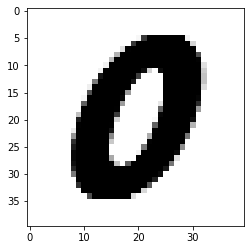

In [3]:
img=cv2.imread("/home/crowwar/Desktop/Fnt/Sample001/img001-00008.png")
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img=cv2.resize(img,(40,40))
plt.imshow(img,cmap="gray")
plt.show()

In [4]:
dataset=[]
for x in range(1,37):
    for y in range(1,301):
        if(y<10 and x<10):
            path="/home/crowwar/Desktop/Fnt/Sample00"+str(x)+"/"+"img00"+str(x)+"-0000"+str(y)+".png"
            
        elif(10<=y<100 and x<10):
            path="/home/crowwar/Desktop/Fnt/Sample00"+str(x)+"/"+"img00"+str(x)+"-000"+str(y)+".png"
            
        elif(y>=100 and x<10):
            path="/home/crowwar/Desktop/Fnt/Sample00"+str(x)+"/"+"img00"+str(x)+"-00"+str(y)+".png"
            
        elif(y<10 and x>=10):
            path="/home/crowwar/Desktop/Fnt/Sample0"+str(x)+"/"+"img0"+str(x)+"-0000"+str(y)+".png"
            
        elif(10<=y<100 and x>=10):
            path="/home/crowwar/Desktop/Fnt/Sample0"+str(x)+"/"+"img0"+str(x)+"-000"+str(y)+".png"
            
        elif(y>=100 and x>=10):
            path="/home/crowwar/Desktop/Fnt/Sample0"+str(x)+"/"+"img0"+str(x)+"-00"+str(y)+".png" 
        img=cv2.imread(path) 
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img=cv2.resize(img,(40,40))
        dataset.append([img,x-1])
            
        

In [5]:
import random
random.shuffle(dataset)
x_train=[]
y_train=[]
x_test=[]
y_test=[]
for x,y in dataset[:-720]:
    x_train.append(x)
    y_train.append(y)
for x,y in dataset[6480:]:
    x_test.append(x)
    y_test.append(y)
x_train=np.array(x_train).reshape(-1,40,40,1)/255.
x_test=np.array(x_test).reshape(-1,40,40,1)/255.
y_train=np.array(y_train)
y_test=np.array(y_test)


In [6]:
model=Sequential()
model.add(Conv2D(80,(5,5),input_shape=(40,40,1),padding="SAME"))
model.add(MaxPooling2D((2,2),strides=1,padding="SAME"))
model.add(Activation("relu"))
model.add(Conv2D(40,(5,5),padding="SAME"))
model.add(MaxPooling2D((2,2),strides=1,padding="SAME"))
model.add(Conv2D(30,(3,3)))
model.add(MaxPooling2D((2,2),strides=1))
model.add(Activation("relu"))
model.add(Conv2D(10,(2,2)))
model.add(MaxPooling2D((2,2),strides=1))
model.add(Flatten())
model.add(Activation("relu"))
model.add(Dense(100))
model.add(Activation("relu"))
model.add(Dense(36))
model.add(Activation("softmax"))
model.compile(optimizer="adam",loss="SparseCategoricalCrossentropy",metrics=["accuracy"])
model.fit(x_train,y_train,batch_size=100,epochs=3)

Epoch 1/3
101/101 [==============================] - 239s 2s/step - loss: 2.0599 - accuracy: 0.4566
Epoch 2/3
101/101 [==============================] - 243s 2s/step - loss: 0.2782 - accuracy: 0.9262
Epoch 3/3
101/101 [==============================] - 237s 2s/step - loss: 0.1518 - accuracy: 0.9567


In [7]:
model.evaluate(x_test,y_test)

135/135 [==============================] - 21s 152ms/step - loss: 0.1146 - accuracy: 0.9694


[0.11456659436225891, 0.9694444537162781]

In [8]:
model.save("alpha_model2.h5")